# 분류와 군집화로 이해하는 지도학습과 비지도학습

* 분류 
    - 정답을 알고있는 상태 지도학습
    - k-NN 알고리즘
        - k-Nearest Neightbor 
        - 특징 공간에 분포하는 데이터에 대하여 k개의 가장 가까운 이웃 데이터를 살펴보고 다수결로 데이터의 레이블을 할당
        - 학습할 가중치가 없다. 입력된 데이터를 기존데이터와 비교하고 분류되기 때문
        - k가 짝수개라면 더 가까운 데이터의 레이블로 분류
        - 단점 : 특징 요소의 개수가 많다면 많은 메모리공간과 계산 시간이 필요
        - 단점 : 알고리즘이 매우 단순하고 직관적, 사전 학습, 특별한 준비시간이 필요 없음
* 군집화
    - 정답을 모르는 상태 비지도 학습

In [1]:
# k-NN 알고리즘

import matplotlib.pyplot as plt
import numpy as np

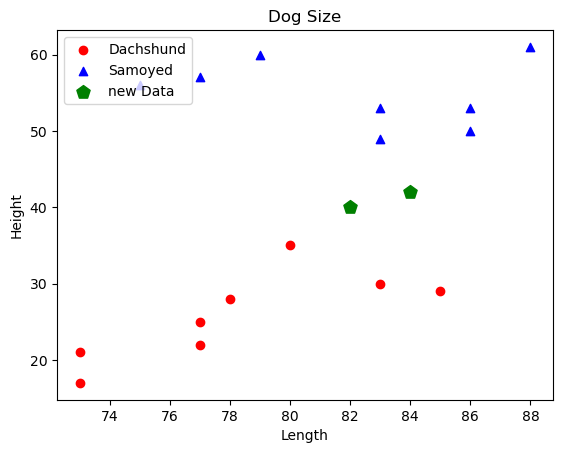

In [15]:
dach_length = [77, 78, 85, 83, 73, 77, 73, 80]
dach_height = [25, 28, 29, 30, 21, 22, 17, 35]

samo_length = [75, 77, 86, 86, 79, 83, 83, 88]
samo_height = [56, 57, 50, 53, 60, 53, 49, 61]

plt.scatter(dach_length, dach_height, c = 'red', label = 'Dachshund')
plt.scatter(samo_length, samo_height, c = 'blue', marker = '^', label = 'Samoyed')

newdata_length = [82, 84]
newdata_height = [40, 42]

plt.scatter(newdata_length, newdata_height, s = 100, marker = 'p', c = 'green', label = 'new Data')

plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Dog Size')
plt.legend(loc = 'upper left')

plt.show()

In [16]:
# k-NN 머신에 넣기위해 데이터를 x, y 형태로 정리

X_dach = np.column_stack((dach_length, dach_height))
y_dach = np.zeros(len(X_dach)) # 정답, class, 데이터 수만큼 0생성  np.zeros(X_dach.shape[0])

X_samo = np.column_stack((samo_length, samo_height))
y_samo = np.ones(len(X_samo)) # 사모예드는 1

X_train = np.concatenate([X_dach, X_samo]) # axis = 0
y_train = np.concatenate([y_dach, y_samo]) # axis = 0

X_test = np.array([[84, 42]]) # 기존 데이터와 특징을 맞춰주기 위해 1, 2 형태로 만든다.

In [17]:
# k-NN 분류기 호출

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) # 비교할 이웃 데이터 개수

knn.fit(X_train, y_train) # 기존 데이터 학습

knn.predict(X_test) # 새로운 데이터 입력하여 분류 예측

array([1.])

# 표집 편향과 성능 측정을 위한 평가지표

* 혼동행렬 

* 표집 편향
    - 만약 분류 데이터가 한 레이블이 압도적으로 많다면.. 
    - ex)10000장의 데이터가 9900장이 사모예드 100장이 닥스훈트라면.. 사모예드로 예측되고 정확도는 항상 높겠지만 
    - 표본 데이터가 편향되어 있으므로 표집 편향이라고 한다.

* 재현율
    - recall, TPR(True Positive Rate)
    - 실제로 P인것중 모델이 P로 예측한 비율
    - TP / P = TP / (FN + TP)
    
* 정밀도 
    - precision
    - 모델을 기준으로,
    - 모델이 P로 분류한 데이터중 실제로 P인 비율
    - TP/ (TP + FP)
    
* 재현율과 정밀도는 데이터를 완벽히 평가하지 못한다. 
    - 두개를 조합해서 평가한다.
    - F1 점수
        - 두 지표를 조합한 점수
        - 정밀도와 재현율의 harmonic mean (조화 평균)
        - 2 * (Pre X Rec) / (Pre + REC)
        - Pre와 Rec를 평균을 내는데 둘이 비슷하면 좋다??
        - F beta score 
            - (1 + beta**2) * (pre * rec) / ((beta**2 * pre) + rec)
            - FP, FN 등등 데이터의 중요도를 따져서
                - ex. 코로나 키트는 약한 음성을 양성으로 판별한다. = FP가 중요하다.
            - FP가 더 중요하다 = pre가 중요하다면 beta > 1
            - FN이 더 중요하다 = rec가 중요하다면 beta < 1
        - F1 score를 훨씬 많이 쓴다.

In [19]:
# F1 score
# 데이터 분류에서 뭘 0으로 1로 분류할지 모를때 더 많은 수 순서로 클래스를 지정한다.

target = np.array([0] * 15 + [1] * 5)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [21]:
pred = np.array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])
pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [26]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, fbeta_score

print('혼동행렬 :', confusion_matrix(target, pred)) #  7 8 2 3
print('정밀도 :', precision_score(target, pred)) # 3 / (3 + 8)
print('재현율 :', recall_score(target, pred)) # 3 / (2 + 3)
print('정확도 :', accuracy_score(target, pred)) # (7 + 3) / (7 + 8 + 2 + 3)
print('F1 점수 :', f1_score(target, pred)) # 정밀도 재현율 조화 평균균
print('F beta 점수 :', fbeta_score(target, pred, beta = 1))

혼동행렬 : [[7 8]
 [2 3]]
정밀도 : 0.2727272727272727
재현율 : 0.6
정확도 : 0.5
F1 점수 : 0.37499999999999994
F beta 점수 : 0.37499999999999994


In [ ]:
# 실제로 머신러닝 후 혼동행렬을 보고서에 기입하지않고 ROC 그래프를 넣는다. Receiver Operating Characteristic
# 로지스틱 회귀

In [2]:
# ROC 예제

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

# 4개 특성, 1개 정답, 150개 데이터

In [3]:
X = iris.data
y = iris.target

In [4]:
mask = y != 0

X = X[mask] # ??????
y = y[mask]

In [5]:
y = y - 1

In [6]:
X = X[:, [0, 2]]

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

lr = LogisticRegression(solver = 'liblinear', C = 0.0001, random_state = 1)

lr.fit(X_train, y_train)

LogisticRegression(C=0.0001, random_state=1, solver='liblinear')

In [8]:
prob = lr.predict_proba(X_test) # class가 0일 확률, 1일 확률 계산

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thres = roc_curve(y_test, prob[:, 0])

In [10]:
roc_auc_score(y_test, prob[:, 0])

0.02666666666666666

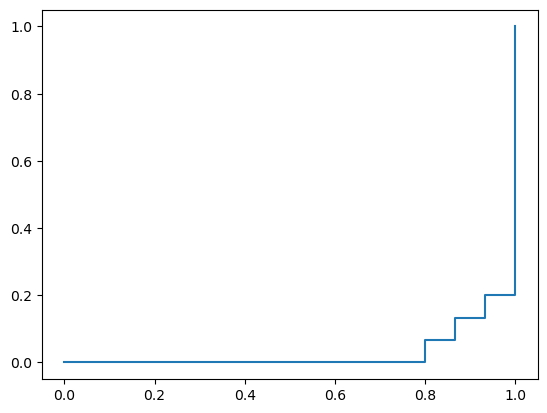

In [11]:
plt.figure()

plt.plot(fpr, tpr)

plt.show()

# 앙상블 기법

* 앙상블에 여러 모델이 들어가있다.
* 같은 데이터에대해 여러 모델이 학습
* 여러 모델중 다수 모델의 분류에 따라 분류
* 다양성 확보
    - 모델의 성격이 다른 것이 좋다.
    - 서로 다른 데이터를 제공해 훈련
        - 잘 사용하지 않는다.
    - 선택된 데이터가 다른 분류기의 학습에도 사용될 수 있으면 배깅 기법
    - AdaBoost 
        - 부스팅 알고리즘 중 가장 일반적
        - 다른 모델이 못 맞춘 데이터를 학습시키는 것 (부스팅 알고리즘)
        1. 각 인스턴스의 가중치를 동일하게 초기화
        2. 예측기를 순차적으로 학습
        3. 한 예측기가 잘못 분류한 데이터 인스턴스의 가중치를 높인다.
        4. 다음 예측기는 높은 가중치의 데이터 인스턴스에 적합하게 학습한다.
        - 단점
            - 개개별의 모델이 과소적합이 잘되기 때문에 데이터수가 너무 적다면 성능이 떨어진다.
            
* 완벽히 다른 성격의 모델일 경우 성능이 가장 좋지만 현실적이지 않음
    - 그래도 한 모델보다 앙상블 기법이 성능이 더 좋다.

In [12]:
# 앙상블 

from sklearn.datasets import load_wine

wine = load_wine()

X = wine.data
y = wine.target

In [13]:
mask = y != 2
X = X[mask]
y = y[mask]

In [14]:
# 앙상블 분류기 불러오기

from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

lr = LogisticRegression(solver = 'liblinear', C = 1, random_state = 1)

bag = BaggingClassifier(base_estimator = lr, n_estimators = 500, n_jobs = -1) # base_estimator : 어떤모델로, n_estimators : 모델의 개수, n_jobs : cpu 코어 이용 개수 (-1은 전체)

bag.fit(X_train, y_train)

p_test = bag.predict(X_test)

C:\Users\PC\anaconda3\envs\CW_AI_Academy\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [15]:
print(f1_score(y_test, p_test))

lr.fit(X_train, y_train)

print(f1_score(y_test, lr.predict(X_test)))

NameError: name 'f1_score' is not defined

In [ ]:
# AdaBoost 

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = lr, n_estimators = 500, learning_rate = 0.1)

ada.fit(X_train, y_train)
p_test = ada.predict(X_test)

f1_score(y_test, p_test)

# 결정트리를 이용한 분류

* 결정트리 Decision tree
    - 귀납 추론을 위해 자주 사용되는 실용적인 방법
    - 데이터들을 트리 구조의 Root에서 시작하여 internal node들을 거쳐 leaf node에 배정하는 기능을 수행
    - ex. root : sepal length가 a보다 큰가 작은가 -> internal node : sepal width가 b보다 큰가 작은가 -> leaf node : setosa
    - 장점
        - 학습이 끝나고나면 node 정보를 뽑아 낼 수 있다.
            - 데이터를 분류하는데 중요한 특성, 지표를 알 수 있다.
            - 구분 기준이 생긴다.
    - 엔트로피 
        - 정보량 측정, 이 값이 크면 많은 정보가 있다
        - 손실함수로 쓰인다.
        - 엔트로피 최소화하기 위해 학습 
            - 같은 성능이라면 node가 가장 적은 것, 모델이 단순한 것을 뽑겠다.
            - 엔트로피가 작다 = 모델이 단순
        - 엔트로피 학습 식 ????? 
        
    - 좋은 분할은 데이터가 잘 나누어져야 함
        - 분할된 노드 각각에 한 종류의 데이터 비율이 높아져서 정보량이 줄어들어야 한다는 것
        - 원래는 정보량에서 분할 후의 정보량을 뺀 값이 커질수록 좋다는 것이며 정보이득이라고 정의
    - 잘 사용되는 3가지 손실함수
        - Cross-entropy : 엔트로피
        - Gini Index : 불순도
        - Misclassification rate 
            - 미분이 힘든 좋지않은 손실함수
    

In [16]:
# Decision Tree 시각화

iris = load_iris()

X = iris.data
y = iris.target

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 3) #  criterion='gini' : 손실함수, max_depth : 최대 깊이 (복잡도 제한), max_features : 트리의 기준 특징, 차원 선택 (복잡도 제한), 
                                             # max_leaf_nodes : 단말 노드 수 (복잡도 제한), min_samples_leaf : (과소적합 방지), min_samples_split
    
tree.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [21]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file = 'iris_tree.dot', feature_names = iris.feature_names)

In [104]:
# dot to jpg
!dot - Tjpg iris_tree.dot -o iris_tree.jpg

'dot'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


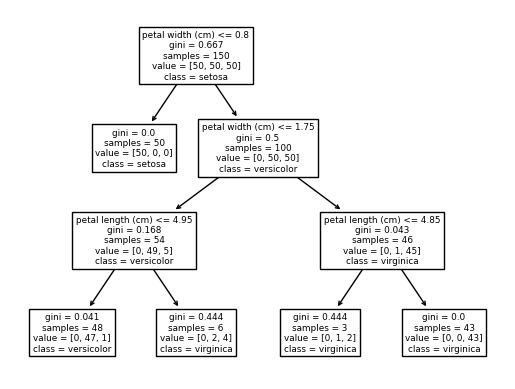

In [22]:
from sklearn.tree import plot_tree

plt.figure()
plot_tree(tree, feature_names = iris.feature_names, class_names = iris.target_names)
plt.show()

# gini : 해당 노드의 손실함수 값, samples : fit할 때 사용된 sample 개수 

In [54]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 4) #  criterion='gini' : 손실함수, max_depth : 최대 깊이 (복잡도 제한), max_features : 트리의 기준 특징, 차원 선택 (복잡도 제한), 
                                             # max_leaf_nodes : 단말 노드 수 (복잡도 제한), min_samples_leaf : (과소적합 방지), min_samples_split
    
tree.fit(X[:, [0, 2]], y)

DecisionTreeClassifier(max_depth=4)

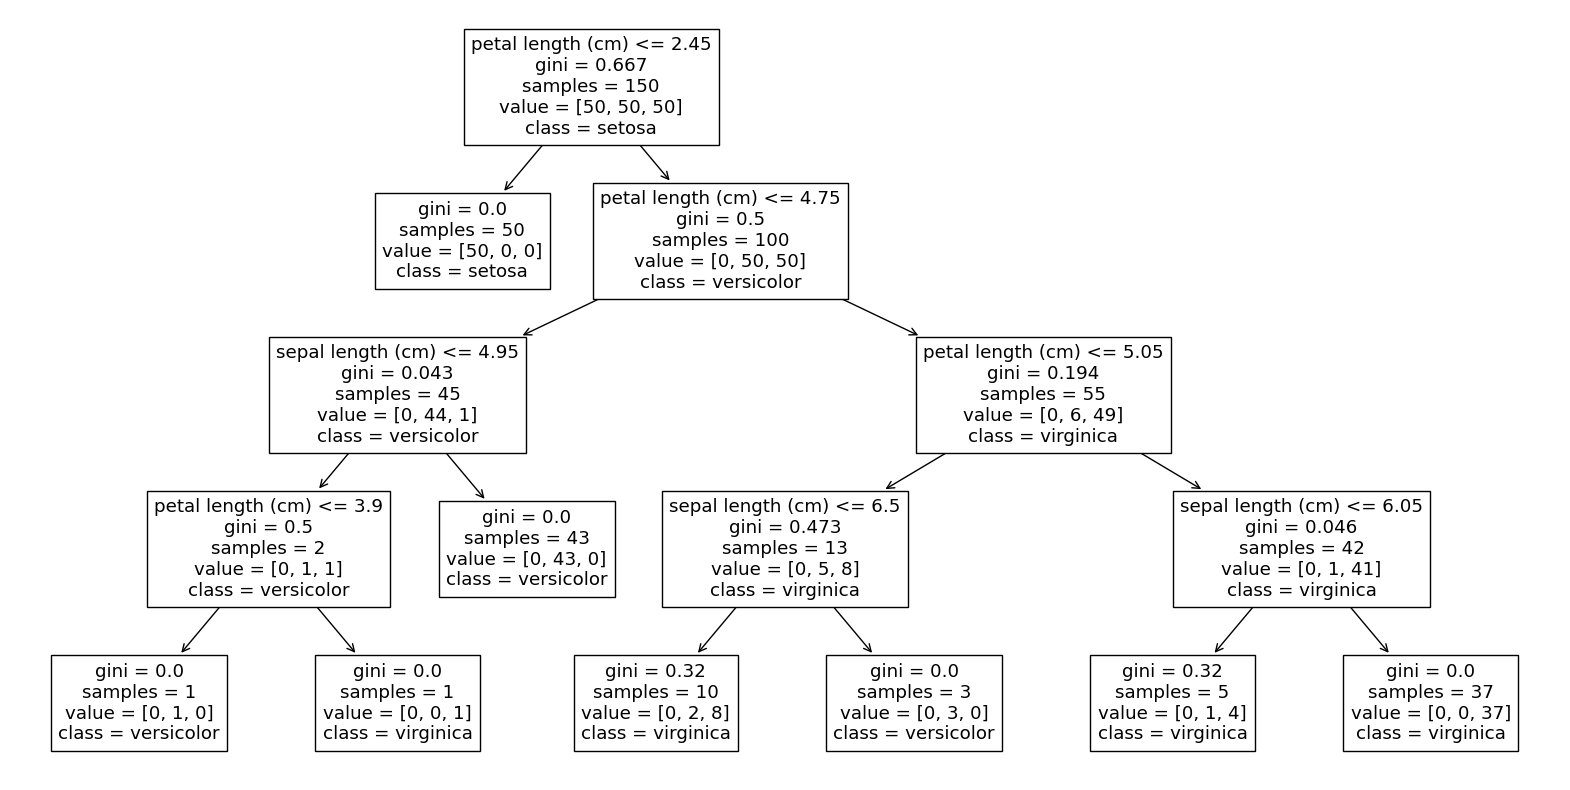

In [55]:
from sklearn.tree import plot_tree

plt.figure(figsize = (20, 10))
plot_tree(tree, feature_names = iris.feature_names[::2], class_names = iris.target_names)
plt.show()

# gini : 해당 노드의 손실함수 값, samples : fit할 때 사용된 sample 개수 

In [56]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02): # classifier 분류기, 모델, 퍼셉트론

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface 잘린 공간 표현
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    #print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) # 공간 색칠
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)


C:\Users\PC\AppData\Local\Temp\ipykernel_1204\2875022574.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\PC\AppData\Local\Temp\ipykernel_1204\2875022574.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


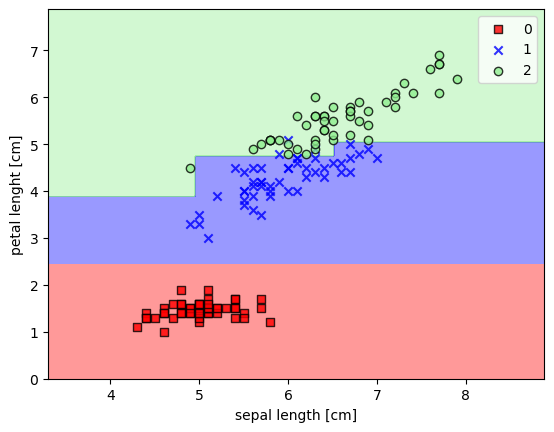

In [57]:
plot_decision_regions(X[:, [0, 2]], y, tree)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal lenght [cm]')

plt.legend()
plt.show()

# max depth가 깊을 수록 과대적합이 생긴다. 

In [62]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion = 'gini', n_estimators = 25, random_state = 1, n_jobs = -1, max_depth = 4)
# 개개인의 모델은 성능이 좋지않다. 데이터를 일부러 과소적합시킨다. 
# 어떤 특성이 중요한지 판별할 수 있다.
# 최종단계으로 사용하기보다 특성선택을 위해 사용 할 수 있다.

forest.fit(X[:, [0, 2]], y)

RandomForestClassifier(max_depth=4, n_estimators=25, n_jobs=-1, random_state=1)

In [63]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02): # classifier 분류기, 모델, 퍼셉트론

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface 잘린 공간 표현
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    #print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) # 공간 색칠
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)


C:\Users\PC\AppData\Local\Temp\ipykernel_1204\2875022574.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\PC\AppData\Local\Temp\ipykernel_1204\2875022574.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


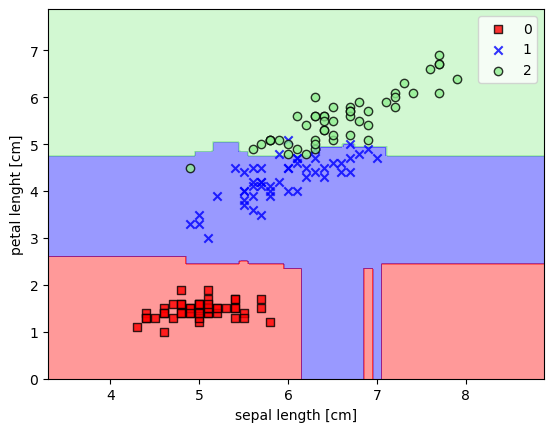

In [64]:
plot_decision_regions(X[:, [0, 2]], y, forest)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal lenght [cm]')

plt.legend()
plt.show()

# random forest의 장점 : tree보다 과대적합이 덜하다.

In [66]:
# Random Forest로 특성 선택하기

X = wine.data
y = wine.target

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = )

forest = RandomForestClassifier(n_estimators = 500, random_state = 1)

forest.fit(X, y)

RandomForestClassifier(n_estimators=500, random_state=1)

nonflavanoid_phenols
ash
alcalinity_of_ash
proanthocyanins
malic_acid
magnesium
total_phenols
hue
od280/od315_of_diluted_wines
alcohol
color_intensity
flavanoids
proline


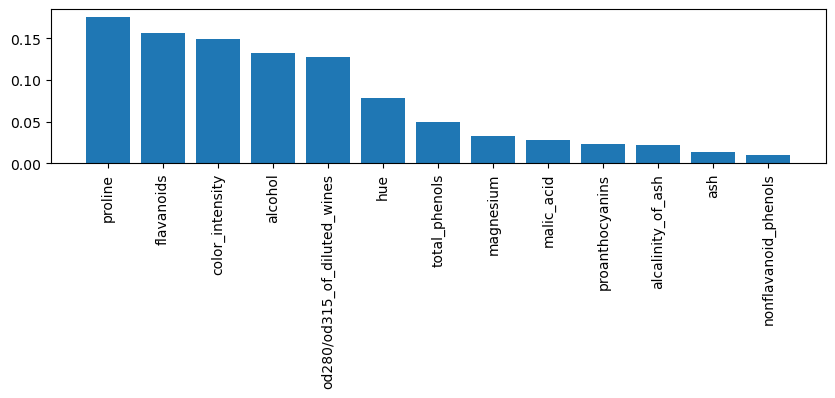

In [88]:
# 특성 중요도 feature_importances_
ipt = forest.feature_importances_

np.sort(ipt)

# zip(ipt, wine.feature_names)
# np.argsort(ipt) # 정렬된 순서대로 정렬전 index번호가 나온다.

for i in np.argsort(ipt) :
    print(wine.feature_names[i])

idxs = np.argsort(ipt)[::-1] # 역순, 내림차순

plt.figure(figsize = (10, 2))

plt.bar(np.array(wine.feature_names)[idxs], ipt[idxs])

plt.xticks(rotation = 90)

plt.show()

# 차원 축소

* 특성을 선택하고 남은 데이터들도 중요도는 낮지만 중요한 정보를 가지고 있을 수 있다.
* 버려지는 특성에도 정보가 있기 때문에 

 1. 주성분 분석 : 비지도 기법 (PCA)
     - 데이터의 축을 바꿔가며 축의 분산을 구하고 분산이 가장 큰 축을 기준으로 데이터를 투영하여 데이터손실을 최소화하고 차원을 축소한다. 
     - 데이터가 클래스를 따지지 않기 때문에 두 클래스 데이터가 다 겹칠 수도 있다.
 2. 선형 판별 분석 : 지도 기법 (LDA)
     - 클래스별로 데이터가 안겹치고 가장 먼 축을 선택한다. 
     - PCA보다 성능이 좋을 수 밖에 없다.

In [90]:
# PCA 예제

X = iris.data
y = iris.target

In [92]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X) # pca.fit_transform(X_train), pca.transform(X_test) 이 맞지만 생략


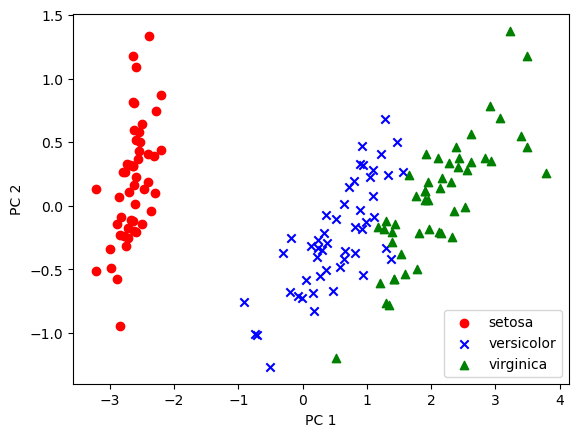

In [101]:
plt.figure()

plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color = 'blue', marker = 'x', label = 'versicolor')
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], color = 'green', marker = '^', label = 'virginica')

plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.legend()
plt.show()

# iris 4가지 특성을 2개 차원으로 축소한 그래프

# 머신러닝 수행 과정

1. 데이터 수집 <- 센서
2. 데이터 가공 및 통계 ex. Pivot table <- 넘파이, 판다스 
3. 데이터 전처리1 (결측치/이상치 처리) <- 넘파이, 판다스 
4. train_test_split
5. 데이터 전처리2 (스케일링/값 보정, 이미지 처리) <- 넘파이, OpenCV(이미지)
6. 특성 선택 !train data로만!(상관분석, 차원축소, 특성중요도) <- 판다스, sklearn
7. 모델 선택 !train data로만!(모델 종류, 하이퍼파라미터) <- sklearn
8. 커널 트릭 및 모델 학습 !train data로만! (비선형일 경우 Polynomial, SVM)
9. 모델 테스트 (4 ~ 7 과정에서 transform/predict)

In [102]:
# LDA 예제

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 2) # 2차원으로

X_lda = lda.fit_transform(X, y) # lda.fit_transform(X_train, y_train), lda.transform(X_test)

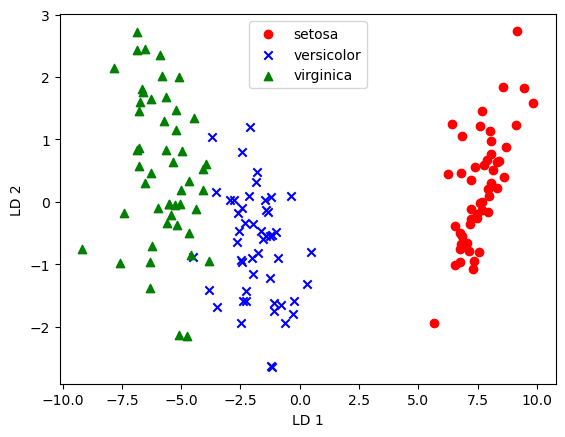

In [103]:
plt.figure()

plt.scatter(X_lda[y == 0, 0], X_lda[y == 0, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X_lda[y == 1, 0], X_lda[y == 1, 1], color = 'blue', marker = 'x', label = 'versicolor')
plt.scatter(X_lda[y == 2, 0], X_lda[y == 2, 1], color = 'green', marker = '^', label = 'virginica')

plt.xlabel('LD 1')
plt.ylabel('LD 2')

plt.legend()
plt.show()

# lda결과 pca에 비해 일자로 데이터가 서있다. 직선으로 충분히 분류가 가능하다. 

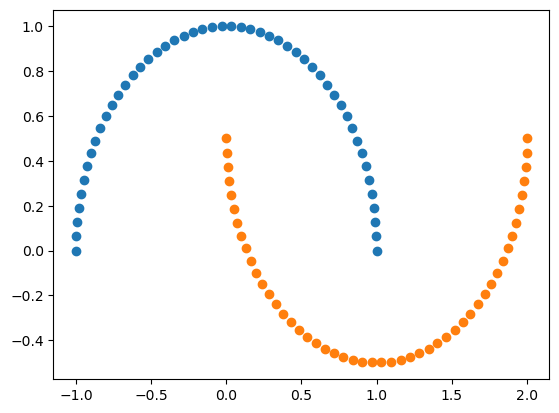

In [108]:
from sklearn.datasets import make_moons, make_circles

X, y = make_moons(n_samples = 100, random_state = 1)

plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])

plt.show()

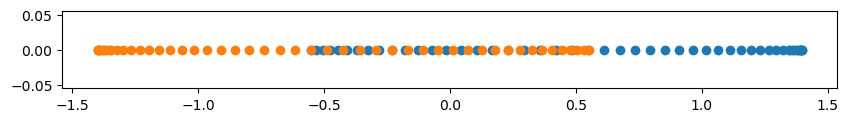

In [111]:
pca = PCA(n_components = 1)

X_pca = pca.fit_transform(X)

plt.figure(figsize = (10, 1))

plt.scatter(X_pca[y == 0, 0], np.zeros_like(X_pca[y == 0, 0])) # shape이 같은 0으로 가득찬 배열 생성  = np.zeros(X_pca[y == 0, 0].shape)
plt.scatter(X_pca[y == 1, 0], np.zeros_like(X_pca[y == 1, 0]))

plt.show()

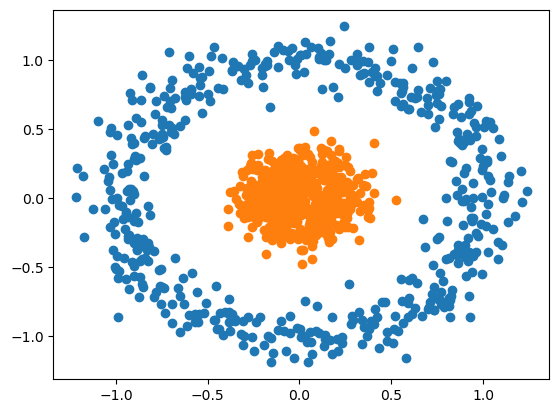

In [113]:
from sklearn.datasets import make_moons, make_circles

X, y = make_circles(n_samples = 1000, random_state = 1, noise = 0.1, factor = 0.2)

plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])

plt.show()

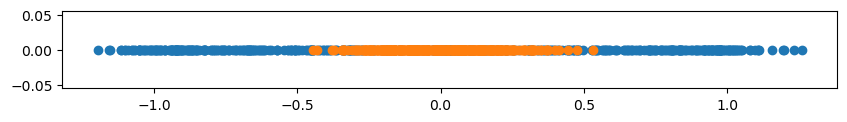

In [114]:
pca = PCA(n_components = 1)

X_pca = pca.fit_transform(X)

plt.figure(figsize = (10, 1))

plt.scatter(X_pca[y == 0, 0], np.zeros_like(X_pca[y == 0, 0])) # shape이 같은 0으로 가득찬 배열 생성  = np.zeros(X_pca[y == 0, 0].shape)
plt.scatter(X_pca[y == 1, 0], np.zeros_like(X_pca[y == 1, 0]))

plt.show()

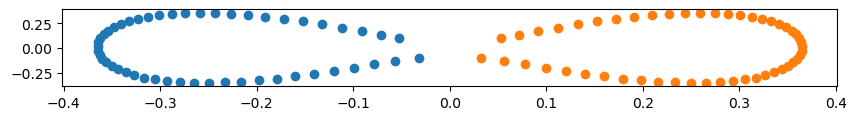

In [117]:
# kernel PCA 뭉쳐있는 데이터를 뭉쳐주고 떨어져있는 데이터를 분리한다.

from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples = 100, random_state = 1)

pca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 15)

X_pca = pca.fit_transform(X)

plt.figure(figsize = (10, 1))

plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1]) # shape이 같은 0으로 가득찬 배열 생성  = np.zeros(X_pca[y == 0, 0].shape)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1])

plt.show()

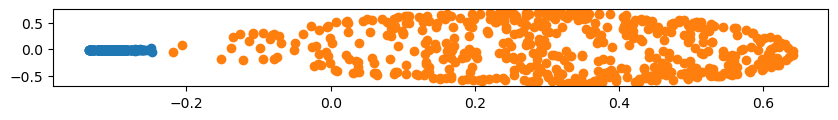

In [129]:
from sklearn.decomposition import KernelPCA

X, y = make_circles(n_samples = 1000, random_state = 1, noise = 0.1, factor = 0.2)

pca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 15)

X_pca = pca.fit_transform(X)

plt.figure(figsize = (10, 1))

plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1]) # shape이 같은 0으로 가득찬 배열 생성  = np.zeros(X_pca[y == 0, 0].shape)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1])

plt.show()